<a href="https://colab.research.google.com/github/askot19/Analise_de_dados/blob/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%203/ex301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">

Este notebook visa aprofundar meus conhecimentos práticos em Ciência de Dados. Meu objetivo aqui é implementar o que já conheço da linguagem Python e desenvolver projetos completos acerca da área. Como bibliografia básica utlizarei o **Projetos de Ciência de Dados com Python - Stephen Klosterman**, que visa tratar dados desde o tipo de a análise mais simples (exploratória de dados) até aplicações envolvendo modelos preditivos e Machine Learning. As ferramentas que utilizarei serão principalmente o **Colaboratory do Google** e o **Jupyter Notebook - Anaconda**. O intuito aqui é consumir toda a literatura e me inserir do dia-a-dia de um profissional de dados, atuando tanto como Cientista quanto como Analista de Dados. Pretendo me tornar um profissional mais qualificado após estes desenvolvimentos.
</p>

---

# 3. Details of Logistic Regression and Feature Exploration
#### Objetivos

Este capítulo ensina como avaliar características de maneira rápida e eficiente, com o intuito de se compreender quais serão as mais importantes para um Modelo de Machine Learning. Uma vez que conseguirmos compreender esse fator, iremos explorar mais a fundo a regressão logística de forma que você possa masterizar essa técnica fundamental. Após a leitura desse capítulo, você será capaz de construir um gráfico de correlação de diversas características e variáveis de resposta e interpretar a regressão logística como um modelo linear.

## Características do Dataset

* `ID`: Código de identificação da conta
* `LIMIT_BAL`: Valor do Crédito fornecido (em novos dólares taiwaneses (NT)) inclusive o crédito do consumidor individual e familiar (complementar).
* `SEX`: Gênero (1 = masculino; 2 = feminino).
* `EDUCATION`: Instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).
* `MARRIAGE`: Estado civil (1 = casado; 2 = solteiro; 3 = outros).
* `AGE`: Idade (ano).
* `PAY_1-PAY_6`: Registro de pagamentos passados. Pagamentos mensais passados, registrados de setembro a abril. Ex.: PAY_1 representa o status de reembolso em setembro; PAY_2 representa o status de reembolso em agosto, e a assim por diante. Os registros são armazenados da seguinte maneira -1 = pagamento pontual; 1 = atraso de um mês de pagamento; 2 = atraso de dois meses de pagamento até chegar em 9 = atraso de nove meses ou mais no pagamento.
* `BILL_AMT1-BILL_AMT6`: Valor da fatura (em novos dólares taiwaneses). BILL_ATM1 representa o valor da fatura em setembro; BILL_AMT2 representa o valor da fatura em agosto; e assim por diante até BILL_AMT6, que representa o valor da fatura em abril.
* `PAY_AMT1-PAY_AMT6`: Valor de pagamentos anteriores (novos dólares taiwaneses). PAY_AMT1 representa o valor pago em setembro; PAY_AMT2 representa o valor pago em agosto; e assim por diante até PAY_AMT6, que representa o valor pago em abril.


In [1]:
# Carregando pacotes necessários para a análise de dados
import pandas as pd #Manipulação de dados
import numpy as np #Computação numérica
import matplotlib.pyplot as plt #Pacote de gráficos
#Renderização de gráficos
%matplotlib inline
import matplotlib as mpl #Adiciona funcionalidades gráficas
import seaborn as sns #Pacote de gráricos
mpl.rcParams['figure.dpi'] = 400 #Alta resolução

df = pd.read_csv('https://github.com/askot19/Analise_de_dados/raw/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/Chapter_1_cleaned_data.csv')

In [2]:
features_response = df.columns.tolist()

In [3]:
features_response[: 5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [4]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [5]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']

In [6]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
corr = df[features_response].corr()
corr.iloc[0:5, 0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<Axes: >

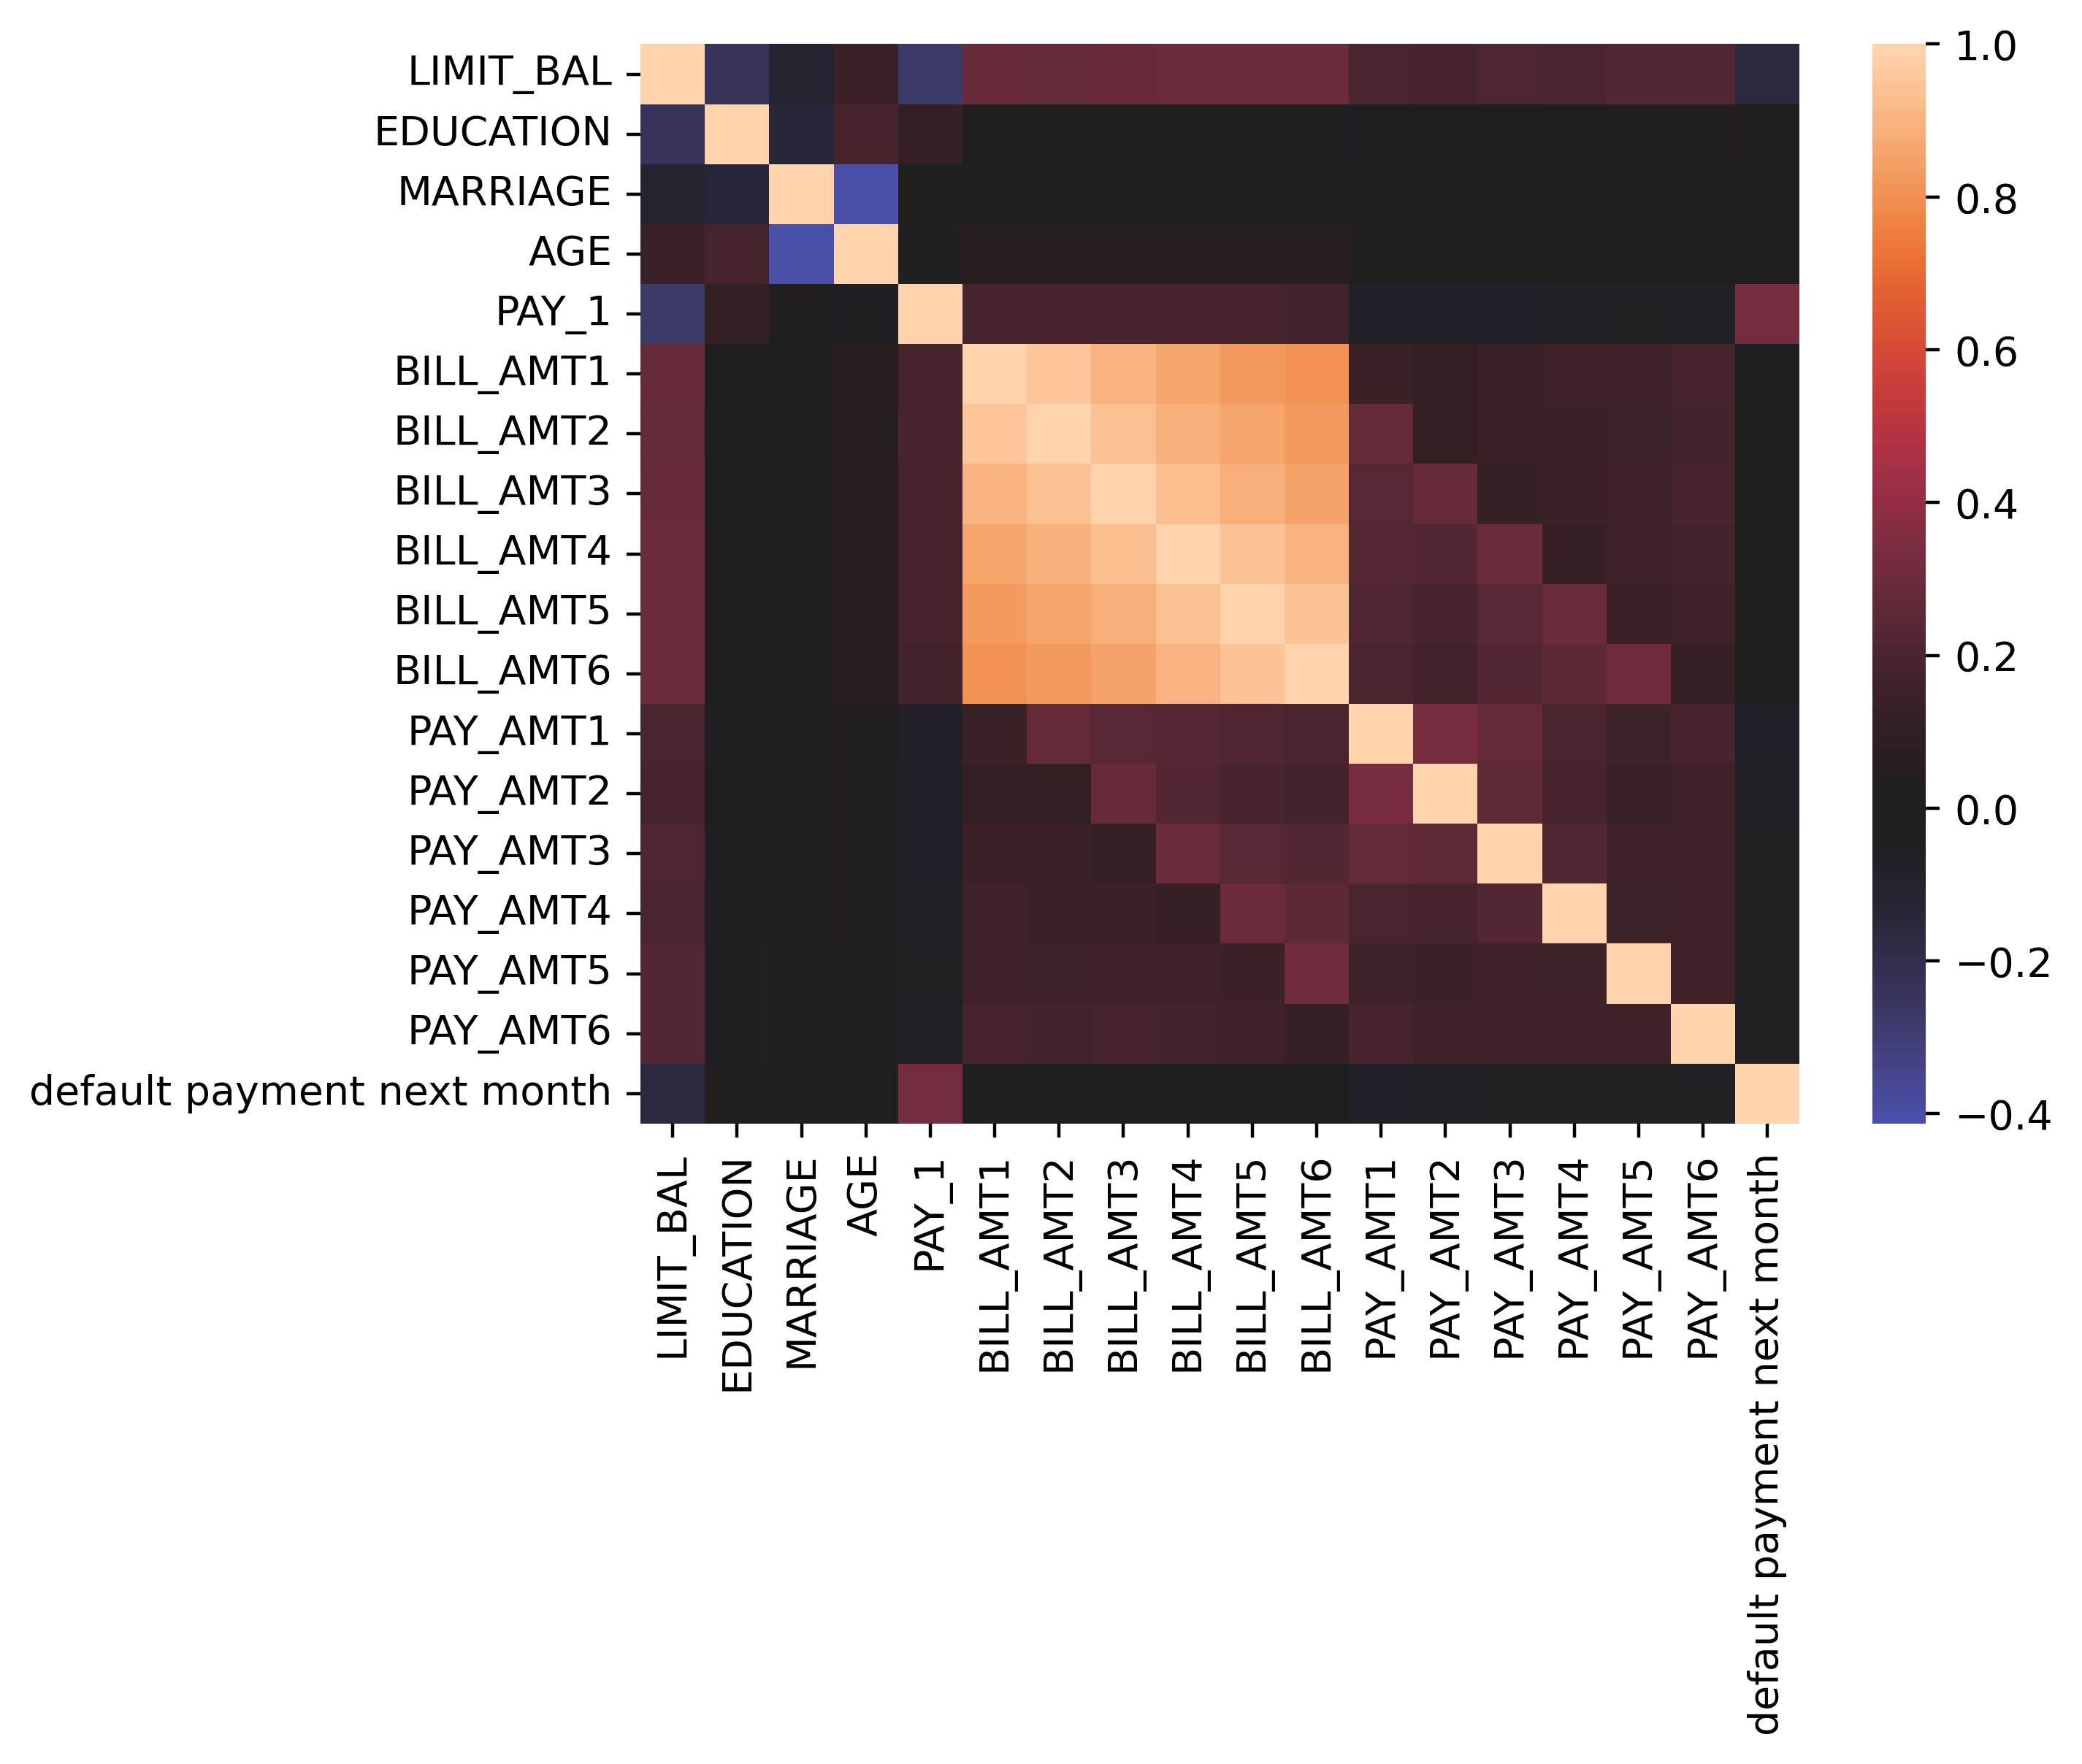

In [8]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0)

In [9]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [10]:
from sklearn.feature_selection import f_classif

In [11]:
[f_stat, f_p_value] = f_classif(X, y)

In [12]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1], 'F statistic': f_stat, 'p value':f_p_value})

f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [13]:
from sklearn.feature_selection import SelectPercentile

In [14]:
selector = SelectPercentile(f_classif, percentile=20)

In [15]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [16]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [17]:
features = features_response[:-1]

In [18]:
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]

In [19]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

## 3.02: Visualizing the relationship between the features and response variable

Aqui vamos aprofundar o conhecimento em plotar funções do Matplotlib. Vamos aprender a como customizar gráficos para se adequarem melhor a responder perguntas específicas. Conforme prosseguimos a análise, vamos criar visualizações de como **`PAY_1`** e **`LIMIT_BAL`** são características que estão relacionadas à variável de resposta, o que pode auxiliar na hipótese que você tenha feito acerca das características. Isso será feito para se tornar mais familiar com a **Interface de Programação e Aplicação** do Matplotlib (API), em outras palavras, a sintaxe usual para interagir com o Matplotilib.

In [20]:
# Importação das bibliotecas necessárias para a análise
import numpy as np #computação numérica
import pandas as pd #manipulação de dados
import matplotlib.pyplot as plt #pacote de plotagem
#próxima linha é para renderização
%matplotlib inline
import matplotlib as mpl #mais funcionalidades de plotagem
import seaborn as sns #pacote de plotagens mais bonitas
mpl.rcParams['figure.dpi'] = 400 #figuras de alta resolução

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/askot19/Analise_de_dados/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/Chapter_1_cleaned_data.csv')

In [22]:
features_response = df.columns.tolist()

In [23]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']

In [24]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [25]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [26]:
#Calculando baseline para a variável de resposta da taxa padrão de todo o dataset

overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [27]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


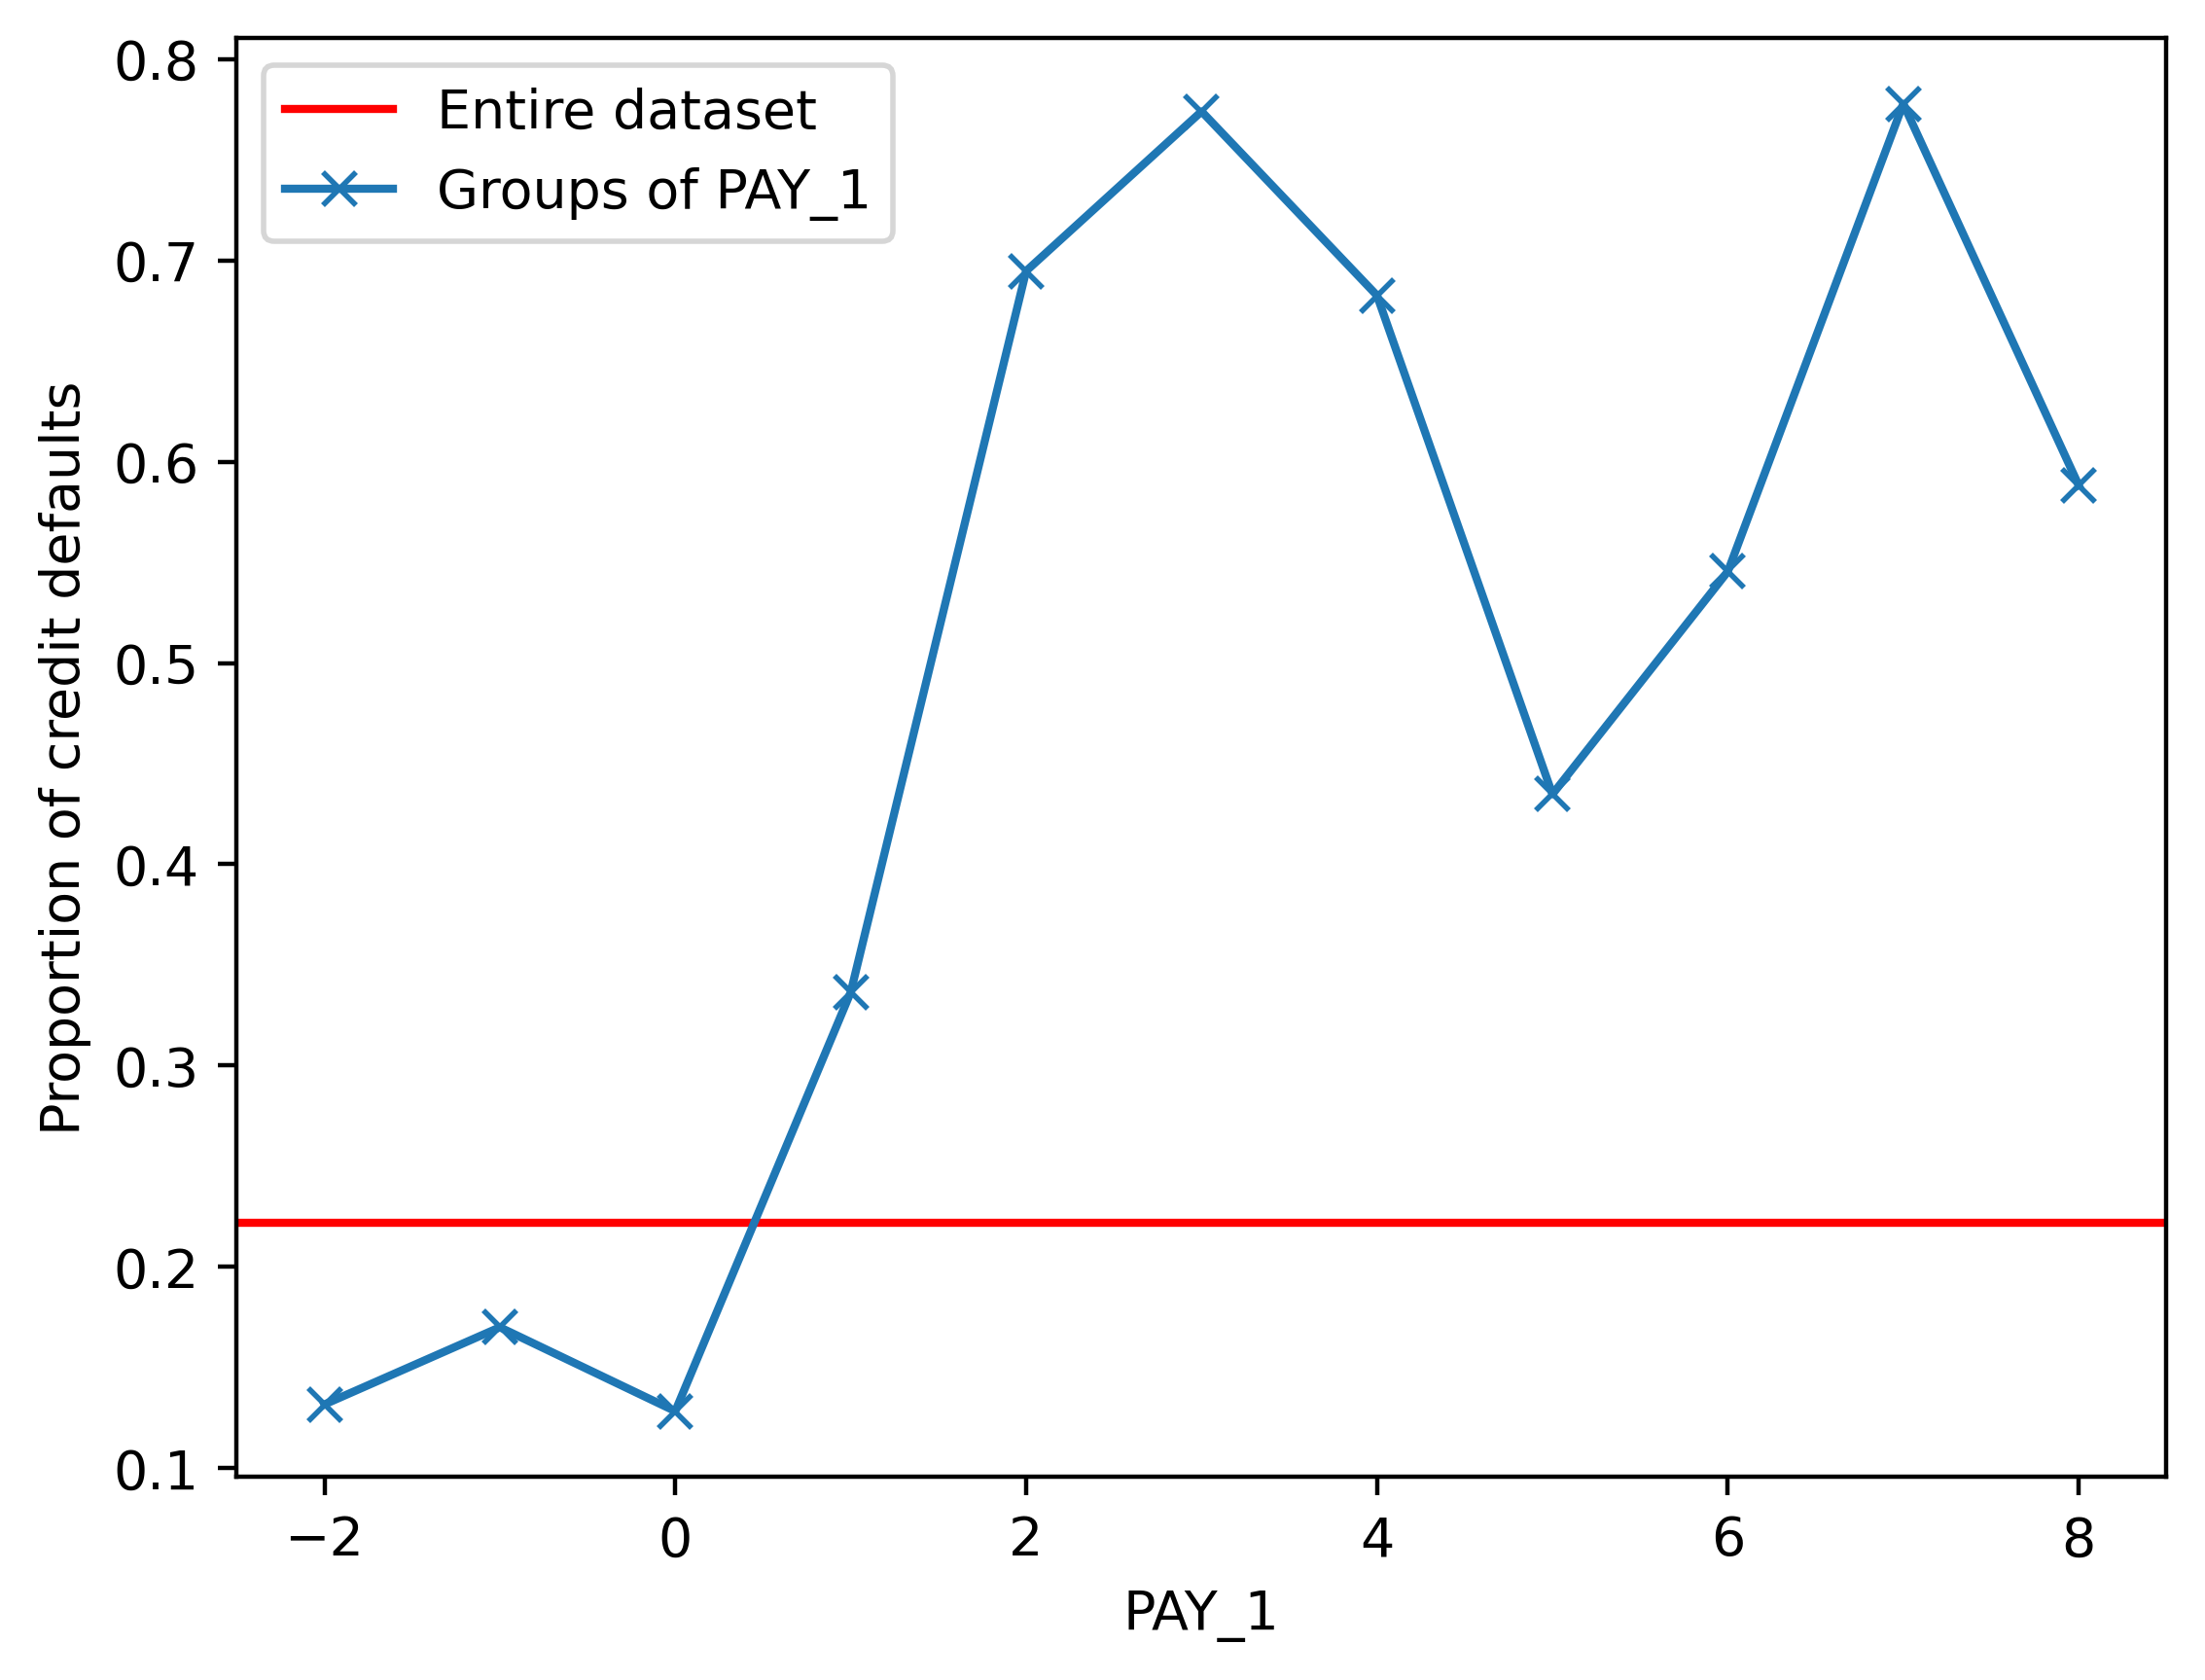

In [28]:
axes = plt.axes()
axes.axhline(overall_default_rate, color ='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

In [29]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

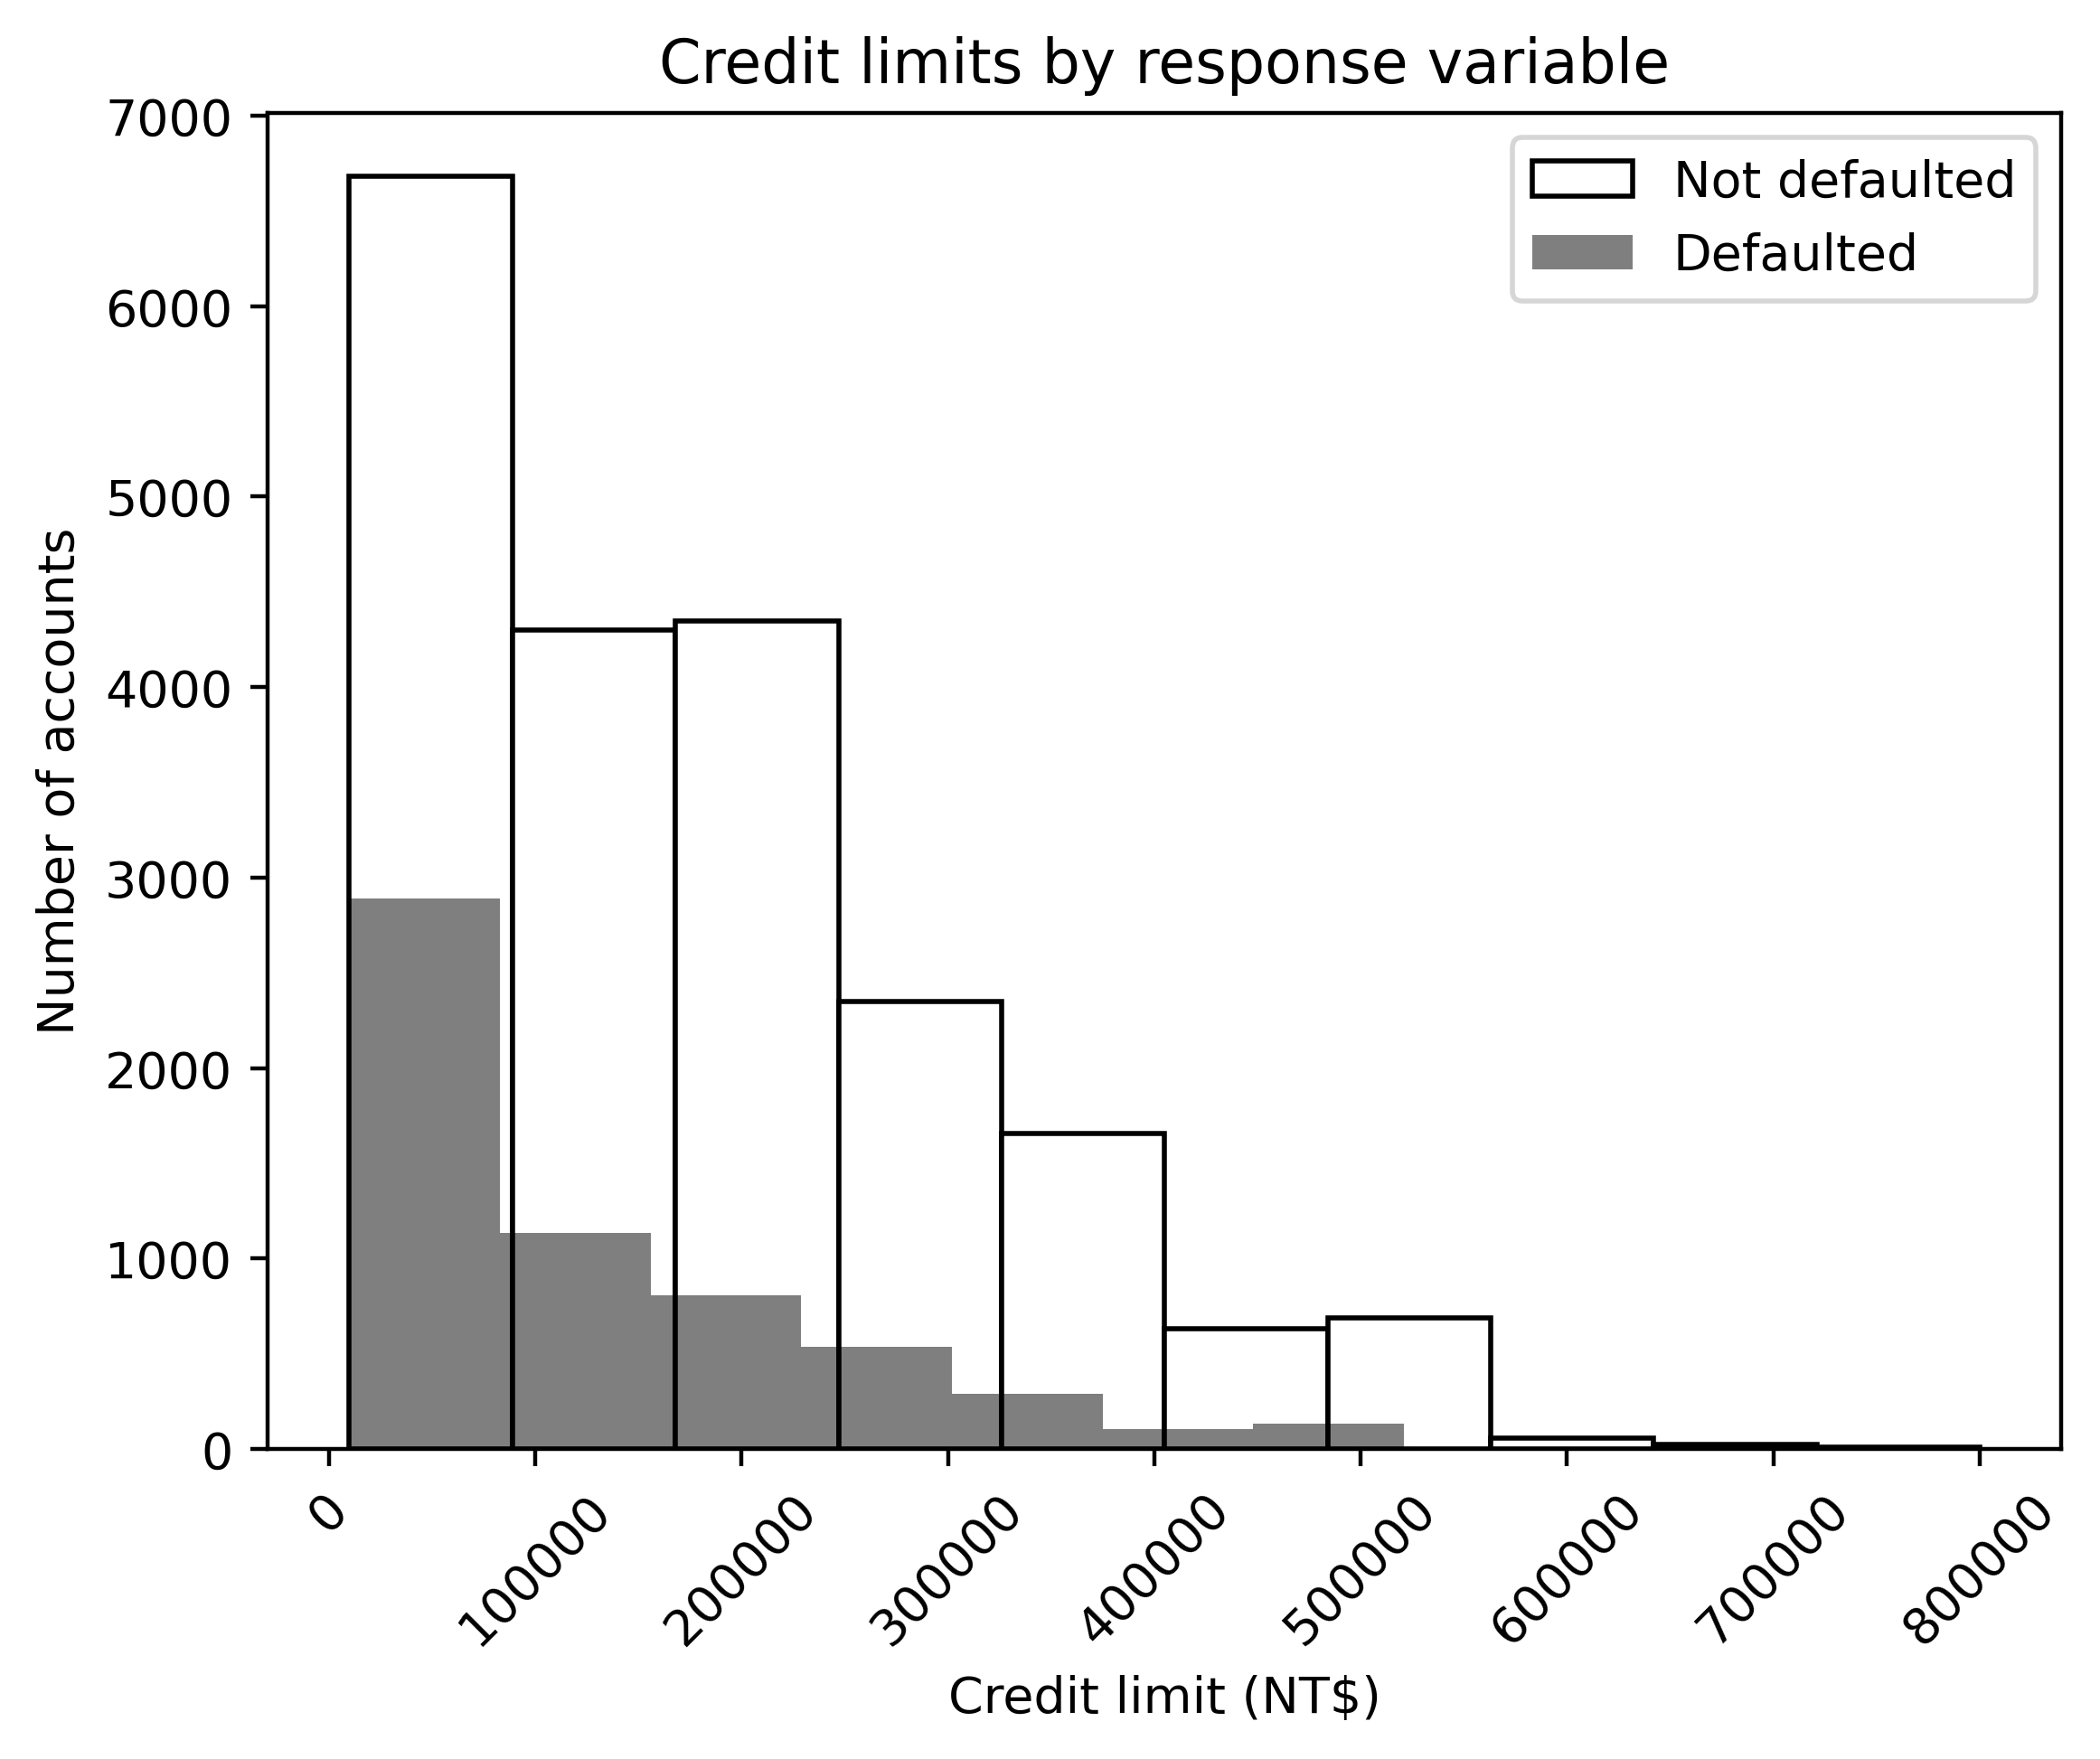

In [32]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], edgecolor ='black', color='white')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha= 0.5, edgecolor=None, color ='black')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')